In [1]:
import spacy

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('auspol2019.csv')

In [4]:
df.isnull().sum()

created_at              0
id                      0
full_text               0
retweet_count           9
favorite_count          9
user_id                 9
user_name              21
user_screen_name        9
user_description    15720
user_location       36894
user_created_at        18
dtype: int64

In [5]:
df.head()

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,2019-05-20 09:13:44,1130401208756187136,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45
1,2019-05-20 09:13:43,1130401205367140357,@narendramodi @smritiirani Coverage of indian ...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40
2,2019-05-20 09:13:33,1130401162782371841,@workmanalice Do you know if Facebook is relea...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06
3,2019-05-20 09:13:29,1130401143551434753,@vanbadham We all understand we have a compuls...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30
4,2019-05-20 09:13:23,1130401118666809345,"Shares were mixed in Asia, with India and Aust...",0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59


# DATA PREPROCESSING

In [6]:
df['full_text'] = df['full_text'].str.lower() #converting all upper case characters to lowercase characters

In [7]:
x =  spacy.load('en_core_web_md')

In [8]:
stop_words = x.Defaults.stop_words

In [9]:
stop_words   #Here is the list of stop words that we are going to use for our tweets.

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [10]:
#Removing Stop words
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['full_text'] = df['full_text'].apply(lambda text: cleaning_stopwords(text))
df['full_text'].head()

0    climate election: shellshocked green groups re...
1    @narendramodi @smritiirani coverage indian ele...
2    @workmanalice know facebook releasing election...
3    @vanbadham understand compulsory preference sy...
4    shares mixed asia, india australia leading gai...
Name: full_text, dtype: object

In [11]:
#Removing Punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['full_text']= df['full_text'].apply(lambda x: cleaning_punctuations(x))


In [12]:
df.head()

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,2019-05-20 09:13:44,1130401208756187136,climate election shellshocked green groups rem...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45
1,2019-05-20 09:13:43,1130401205367140357,narendramodi smritiirani coverage indian elect...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40
2,2019-05-20 09:13:33,1130401162782371841,workmanalice know facebook releasing election ...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06
3,2019-05-20 09:13:29,1130401143551434753,vanbadham understand compulsory preference sys...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30
4,2019-05-20 09:13:23,1130401118666809345,shares mixed asia india australia leading gain...,0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59


In [13]:
import re

In [14]:
#Removing URL's from dataframe

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['full_text'] = df['full_text'].apply(lambda x: cleaning_URLs(x))

In [15]:
df.head()

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,2019-05-20 09:13:44,1130401208756187136,climate election shellshocked green groups rem...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45
1,2019-05-20 09:13:43,1130401205367140357,narendramodi smritiirani coverage indian elect...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40
2,2019-05-20 09:13:33,1130401162782371841,workmanalice know facebook releasing election ...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06
3,2019-05-20 09:13:29,1130401143551434753,vanbadham understand compulsory preference sys...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30
4,2019-05-20 09:13:23,1130401118666809345,shares mixed asia india australia leading gain...,0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59


In [16]:
#Removing numbers from text
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['full_text'] = df['full_text'].apply(lambda x: cleaning_numbers(x))

# ANALYSIS OF TWEETS USING POLARITY SCORES.

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [24]:
df['scores'] = df['full_text'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

#compound column is degree of measure how much a tweet is positive or negative

In [25]:
df.head()

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at,scores,compound
0,2019-05-20 09:13:44,1130401208756187136,climate election shellshocked green groups rem...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.2732
1,2019-05-20 09:13:43,1130401205367140357,narendramodi smritiirani coverage indian elect...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2019-05-20 09:13:33,1130401162782371841,workmanalice know facebook releasing election ...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06,"{'neg': 0.182, 'neu': 0.682, 'pos': 0.136, 'co...",-0.1531
3,2019-05-20 09:13:29,1130401143551434753,vanbadham understand compulsory preference sys...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.3612
4,2019-05-20 09:13:23,1130401118666809345,shares mixed asia india australia leading gain...,0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp...",0.5574


# Visualization

In [26]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

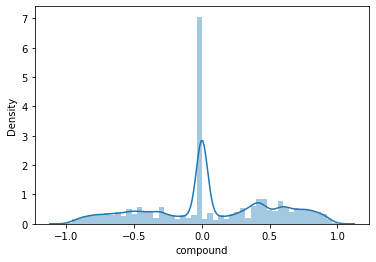

In [27]:
sns.distplot(df['compound'])

This graph shows how much dense the tweets about election are.
It can be observed Most of the tweets are neutral while some are polarised

In [33]:
#Taking zero as the center of our distribution we will classify our tweets as positive if compound > 0 and negative if  compound <0 and 0 otherwise.

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >0 else('neutral' if c==0 else 'neg') )

<AxesSubplot:xlabel='comp_score', ylabel='Count'>

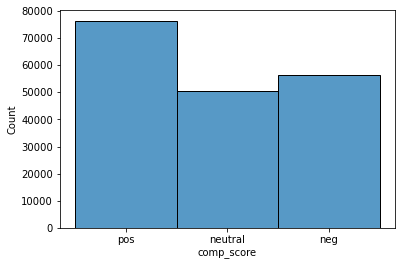

In [39]:
sns.histplot(data=df, x=df['comp_score'])

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [48]:
wordcloud2 = WordCloud(width=800, height=400).generate(' '.join(df['full_text']))

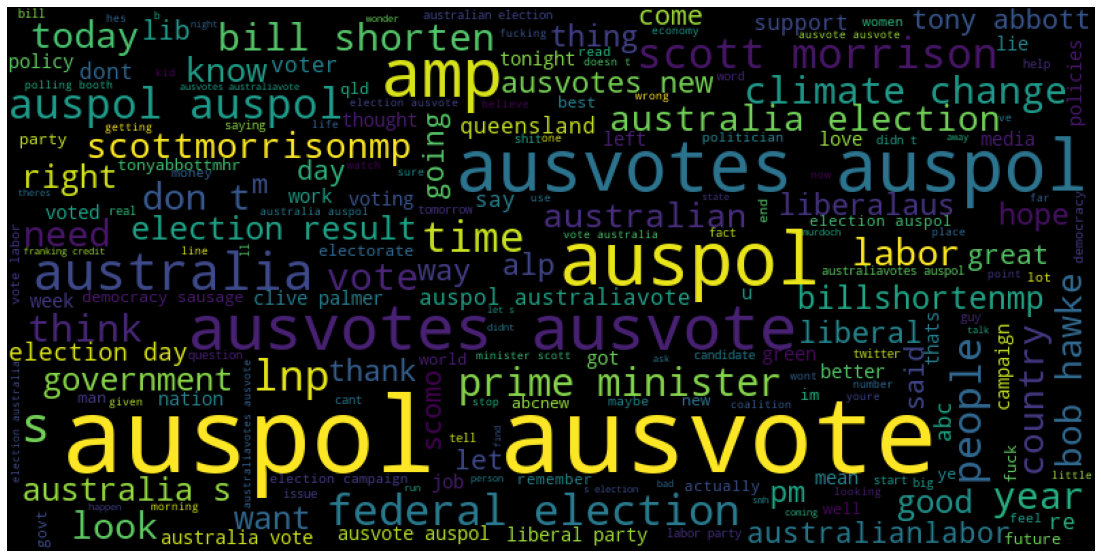

In [53]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### This shows what words are most used in the tweets